#**PRÁCTICA 2: Minería de datos supervisada: CLASIFIACIÓN**#



### **1. Obtenga al menos 10 conjuntos de datos en formato CSV, ARFF u otro cualquiera de Weka datasets ó UCI MLR**

In [5]:
import pandas as pd
import numpy as np
#Método de clasificación KNN (vecino más cercano)
from sklearn.neighbors import KNeighborsClassifier
#Método de clasifiación DecisionTree (árbol de decision)
from sklearn.tree import DecisionTreeClassifier
#Uso de gráficas y representación de datos
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.io import arff


In [6]:
#Lectura de Dataset haciendo uso de URL de github y el nombre de las columnas
def readDataset(file,columns):
  dataset=pd.read_csv(file, header=None, names=columns)
  return dataset

In [7]:
#Iris Data set
columnas=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']
iris_features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/iris.data', columnas)
iris_X= iris[iris_features]
iris_y= iris['class']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Car Evaluation Data set
columnas=['buying','maint','doors', 'persons', 'lug_boot','safety','class']
car_features=['buying','maint','doors', 'persons', 'lug_boot','safety']
car= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/car.data',columnas)
car['buying']=car['buying'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['maint']=car['maint'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['lug_boot']=car['lug_boot'].map({'small':1, 'med':2, 'big':3})
car['safety']=car['safety'].map({'low':1, 'med':2, 'high':3})
car['doors']=car['doors'].map({'1':1, '2':2,'3':3,'4':4,'5more':7}) #Esto hará que 7 signifique más de 5 puertas o personas
car['persons']=car['persons'].map({'1':1, '2':2,'3':3,'4':4,'more':7})
car_X=car[car_features]
car_y=car['class']
car

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,7,7,2,2,good
1724,1,1,7,7,2,3,vgood
1725,1,1,7,7,3,1,unacc
1726,1,1,7,7,3,2,good


In [9]:
#Wine Data Set
columnas= ['class','alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine_features=['alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/wine.data',columnas)
wine_X=wine[wine_features]
wine_y=wine['class']
wine.head()

,class,alcohol,malic acid,ash,alcalinityOfAsh,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
#Diabetes Data Set
columnas=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age','Class']
diabetes_features=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age']
diabetes=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/diabetes.data',columnas)
diabetes_X=diabetes[diabetes_features]
diabetes_y=diabetes['Class']
diabetes.head()


,Times Pregnant,Glucose tolerance,Blood pressure,Triceps skin fold,Insulin,Body mass,Diabetes pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [11]:
#Glass Data set
columnas=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type']
glass_features=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe']
glass=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/glass.data',columnas)
glass_X=glass[glass_features]
glass_y=glass['Type']
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [12]:
#Breast Cancer Wisconsin (Diagnostic) Data set
columnas=['id', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
cancer_features=['Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
cancer=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/breast-cancer-wisconsin.data', columnas)
cancer_X=cancer[cancer_features]
cancer_y= cancer['Class']
cancer.head()

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
#Titanic Data set
titanic = pd.read_csv('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/titanic.csv')
titanic=titanic.drop(['PassengerId','Name', 'Ticket','Cabin','Embarked'],axis=1)
titanic=titanic.dropna()
titanic = titanic.replace({'male':0, 'female':1})
titanic_X=titanic.drop(['Survived'],axis=1)
titanic_y=titanic['Survived']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [14]:
#Flag DataSet
columnas= ['name','landmass', 'zone', 'area','population','language','religion','bars','stripes','colours','red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
flag_features=['landmass', 'zone', 'area','population','language','religion','bars','stripes','colours','red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
flag=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/flag.data',columnas)
flag_X = flag[flag_features]
flag_y = flag['name']
flag.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [15]:
#Vote Data set
columnas = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa', 'class']
vote_features = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa']
vote = readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/vote.data',columnas)
vote = vote.replace({'y':0, 'n':1, '?':2})
vote_X = vote[vote_features]
vote_y = vote['class']
vote.head()

,handicapped-infants,water cost sharing,adoption the budget resolution,physician fee freezen,god aid,religous groups,anti satellite test,aid to nicaraguan contras,mx-misil,inmigration,recortes,gasto de educacion,demandas,crimen,exportacion libre impuestos,adminitracion sur africa,class
0,1,0,1,0,0,0,1,1,1,0,2,0,0,0,1,0,republican
1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,2,republican
2,2,0,0,2,0,0,1,1,1,1,0,1,0,0,1,1,democrat
3,1,0,0,1,2,0,1,1,1,1,0,1,0,1,1,0,democrat
4,0,0,0,1,0,0,1,1,1,1,0,2,0,0,0,0,democrat


In [16]:
#Segment_challeng
columnas = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean','class']
segment_features = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean']
segment = readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/segment_challeng.data',columnas)
segment_X = segment[segment_features]
segment_y = segment['class']
segment.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,144,35,9,0.0,0.0,2.333330,2.033060,2.05556,1.73098,37.5926,32.3333,47.4444,33.0000,-15.77780,29.55560,-13.7778,47.4444,0.319714,-2.13876,cement
1,118,180,9,0.0,0.0,1.944440,1.481990,3.11111,1.08866,48.5556,44.1111,59.0000,42.5556,-13.33330,31.33330,-18.0000,59.0000,0.278822,-1.99604,path
2,6,174,9,0.0,0.0,1.888890,1.007410,2.88889,4.02963,19.0741,15.1111,17.7778,24.3333,-11.88890,-3.88889,15.7778,24.3333,0.381867,2.39502,grass
3,152,220,9,0.0,0.0,0.944445,0.685185,1.44444,2.16296,14.6296,11.5556,13.1111,19.2222,-9.22222,-4.55556,13.7778,19.2222,0.416705,2.30688,grass
4,189,142,9,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.000000,0.00000,window


###**2. Seleccione al menos 3 clasificadores dentro de los disponibles en Scikit. Se recomienda elegir tres de entre los siguientes: árboles de decisión, k vecinos más cercanos, máquinas de vectores soporte y clasificador Naïve de Bayes.**###

In [17]:
from sklearn.model_selection import train_test_split
#Metrics like accuracy_score or confusion matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [18]:
#Modelos a utilizar en esta práctica
tree=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC(kernel='linear', C=1)

In [19]:
#Compute accuracy of model
def accuracyDataset(features, label, model): 
  accuracy=0
  #Split into random train and test subsets
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
  #Entrenamiento de datos de entrenamiento
  model.fit(X_train,y_train)
  #Predice salidas de los datos test
  y_pred = model.predict(X_test)
  #Calcula precisión del modelo
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy

###**3. Para cada uno de los problemas seleccionados realice las siguientes tareas**###

####**3.1. Seleccione como método para obtener el error la validación cruzada de 10 particiones o el método hold out. Seleccione dos métricas de las estudiadas en teoría.**####

####**3.2. Entrene cada clasificador seleccionado y anote el valor de las métricas estudiadas. Fije los hiperparámetros de forma razonable.**####

In [21]:
from sklearn.model_selection import cross_val_score

La función cross_val_score en scikit-learn proporciona una forma fácil de realizar una validación cruzada para encontrar los mejores hiperparámetros para un modelo de aprendizaje automático dado.
Cuando se pasa el parámetro scoring='accuracy' a la función cross_val_score, esto le indica a la función que utilice la precisión (accuracy) como la métrica para evaluar el rendimiento del modelo en los datos de prueba en cada iteración de la validación cruzada.
La función cross_val_score devuelve un arreglo de las puntuaciones de precisión, una para cada iteración de la validación cruzada.
El parámetro scoring se puede establecer para otros valores también para evaluar el modelo para otras métricas como precisión, recall, f1, roc_auc, etc.
Esto permite comparar fácilmente el rendimiento de diferentes modelos o diferentes configuraciones de parámetros utilizando una métrica única y consistente en todos los modelos y todas las iteraciones de la validación cruzada.

In [35]:
def cross_val (metod, data_X, data_y):
  scores_tree_acc=cross_val_score(metod, data_X, data_y, cv=10, scoring='accuracy')
  scores_tree_f1M=cross_val_score(metod, data_X, data_y, cv=10, scoring='f1_macro')
  print("Mean score: ", scores_tree_acc.mean())
  print("Standard deviation: ", scores_tree_acc.std())

  print("Mean score: ", scores_tree_f1M.mean())
  print("Standard deviation: ", scores_tree_f1M.std())
  return scores_tree_acc, scores_tree_f1M

In [20]:
from sklearn.model_selection import GridSearchCV
def comp_principalesSVM(data_X, data_y):
  accuracy_svm=[]
  param_grid= {'kernel': ['linear','rbf','sigmoid'], 'C': [0.1, 1, 3]}
  svm = SVC()
  grid = GridSearchCV(svm, param_grid, cv=5)
  grid_search = grid.fit(data_X, data_y)
  print('Mejores componentes principales: ', grid_search.best_params_)
  svm= SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'])
  return svm

In [82]:
tree_score=[]
knn_score=[]
svm_score=[]

**IRIS DATASET**

In [36]:
iris_tree_cross=cross_val(tree, iris_X, iris_y)

Mean score:  0.9533333333333334
Standard deviation:  0.04268749491621898
Mean score:  0.9597306397306398
Standard deviation:  0.044385023026018204


In [83]:
tree_score.append(iris_tree_cross[0].mean())
tree_score

[0.9533333333333334]

In [37]:
iris_knn_cross=cross_val(knn,iris_X,iris_y)

Mean score:  0.9666666666666668
Standard deviation:  0.04472135954999579
Mean score:  0.9659090909090908
Standard deviation:  0.04612187836421916


In [93]:
knn_score.append(iris_knn_cross[0].mean())
knn_score

[0.9666666666666668]

In [39]:
svm_iris= comp_principalesSVM(iris_X, iris_y)
iris_svm_cross=cross_val(svm_iris,iris_X,iris_y)

Mejores componentes principales:  {'C': 1, 'kernel': 'linear'}
Mean score:  0.9733333333333334
Standard deviation:  0.04422166387140532
Mean score:  0.9726430976430975
Standard deviation:  0.0456897053283


In [102]:
svm_score.append(iris_svm_cross[0].mean())
svm_score

[0.9733333333333334]

**CAR DATASET**

In [40]:
car_tree_cross = cross_val(tree, car_X, car_y)

Mean score:  0.8831328135502083
Standard deviation:  0.06482250932086295
Mean score:  0.8149365956022925
Standard deviation:  0.06256387189757488


In [84]:
tree_score.append(car_tree_cross[0].mean())
tree_score

[0.9533333333333334, 0.8831328135502083]

In [45]:
car_knn_cross = cross_val(knn,car_X, car_y)

Mean score:  0.8380259443473586
Standard deviation:  0.07898676827500006
Mean score:  0.6416245420584059
Standard deviation:  0.15505358846121353


In [94]:
knn_score.append(car_knn_cross[0].mean())
knn_score

[0.9666666666666668, 0.8380259443473586]

In [46]:
svm_car = comp_principalesSVM(car_X, car_y)
car_svm_cross = cross_val(svm_car, car_X, car_y)


Mejores componentes principales:  {'C': 3, 'kernel': 'rbf'}
Mean score:  0.8912017744320474
Standard deviation:  0.043163250960704926
Mean score:  0.7798876496143178
Standard deviation:  0.11795011346859001


In [103]:
svm_score.append(car_svm_cross[0].mean())
svm_score

[0.9733333333333334, 0.8912017744320474]

**Wine Dataset**

In [49]:
wine_tree_cross=cross_val(tree,wine_X, wine_y)

Mean score:  0.865032679738562
Standard deviation:  0.0913519991478125
Mean score:  0.8544223423635188
Standard deviation:  0.13816916991351075


In [85]:
tree_score.append(wine_tree_cross[0].mean())
tree_score

[0.9533333333333334, 0.8831328135502083, 0.865032679738562]

In [50]:
wine_knn_cross = cross_val(knn,wine_X, wine_y)

Mean score:  0.6754901960784313
Standard deviation:  0.06990791132962103
Mean score:  0.645921660039307
Standard deviation:  0.06843977012250366


In [95]:
knn_score.append(wine_knn_cross[0].mean())
knn_score

[0.9666666666666668, 0.8380259443473586, 0.6754901960784313]

In [51]:
svm_wine = comp_principalesSVM(wine_X, wine_y)
wine_svm_cross = cross_val(svm_wine, wine_X, wine_y)

Mejores componentes principales:  {'C': 0.1, 'kernel': 'linear'}
Mean score:  0.9666666666666668
Standard deviation:  0.04444444444444447
Mean score:  0.9679349354349356
Standard deviation:  0.04258453086714391


In [104]:
svm_score.append(wine_svm_cross[0].mean())
svm_score

[0.9733333333333334, 0.8912017744320474, 0.9666666666666668]

**Diabetes Dataset**

In [53]:
diabetes_tree_cross=cross_val(tree,diabetes_X, diabetes_y)

Mean score:  0.7057587149692413
Standard deviation:  0.06998013253175865
Mean score:  0.6842894246437121
Standard deviation:  0.06949527908758969


In [86]:
tree_score.append(diabetes_tree_cross[0].mean())
tree_score

[0.9533333333333334, 0.8831328135502083, 0.865032679738562, 0.7057587149692413]

In [54]:
diabetes_knn_cross=cross_val(knn,diabetes_X,diabetes_y)

Mean score:  0.7213773069036227
Standard deviation:  0.04416817250533367
Mean score:  0.6799338698223518
Standard deviation:  0.05531341496821865


In [96]:
knn_score.append(diabetes_knn_cross[0].mean())
knn_score

[0.9666666666666668,
 0.8380259443473586,
 0.6754901960784313,
 0.7213773069036227]

In [55]:
svm_diabetes= comp_principalesSVM(diabetes_X, diabetes_y)
diabetes_svm_cross=cross_val(svm_diabetes, diabetes_X,diabetes_y)

Mejores componentes principales:  {'C': 3, 'kernel': 'linear'}
Mean score:  0.7682672590567328
Standard deviation:  0.032565457426088296
Mean score:  0.7295058149761875
Standard deviation:  0.03665194502260052


In [105]:
svm_score.append(diabetes_svm_cross[0].mean())
svm_score

[0.9733333333333334,
 0.8912017744320474,
 0.9666666666666668,
 0.7682672590567328]

**Glass Dataset**

In [58]:
glass_tree_cross=cross_val(tree,glass_X, glass_y)

Mean score:  0.6818181818181819
Standard deviation:  0.06902013322033519
Mean score:  0.6136273894950366
Standard deviation:  0.17205323086434204


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [87]:
tree_score.append(glass_tree_cross[0].mean())
tree_score

[0.9533333333333334,
 0.8831328135502083,
 0.865032679738562,
 0.7057587149692413,
 0.6818181818181819]

In [60]:
glass_knn_cross=cross_val(knn,glass_X, glass_y)

Mean score:  0.6491341991341991
Standard deviation:  0.15657132539727017
Mean score:  0.5128044872822097
Standard deviation:  0.15206749107635575


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [97]:
knn_score.append(glass_knn_cross[0].mean())
knn_score

[0.9666666666666668,
 0.8380259443473586,
 0.6754901960784313,
 0.7213773069036227,
 0.6491341991341991]

In [61]:
svm_glass = comp_principalesSVM(glass_X, glass_y)
glass_svm_cross= cross_val(svm_glass, glass_X, glass_y)

Mejores componentes principales:  {'C': 3, 'kernel': 'linear'}
Mean score:  0.6588744588744588
Standard deviation:  0.07587622125545093
Mean score:  0.5509421324289746
Standard deviation:  0.10503635790950594


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [106]:
svm_score.append(glass_svm_cross[0].mean())
svm_score

[0.9733333333333334,
 0.8912017744320474,
 0.9666666666666668,
 0.7682672590567328,
 0.6588744588744588]

**Breast Cancer Wisconsin (Diagnostic) Data set**

In [62]:
cancer_tree_cross=cross_val(tree,cancer_X, cancer_y)

Mean score:  0.9546462063086103
Standard deviation:  0.018974873671600317
Mean score:  0.9516528789048969
Standard deviation:  0.020470303386741853


In [88]:
tree_score.append(cancer_tree_cross[0].mean())
tree_score

[0.9533333333333334,
 0.8831328135502083,
 0.865032679738562,
 0.7057587149692413,
 0.6818181818181819,
 0.9546462063086103]

In [64]:
cancer_knn_cross=cross_val(knn,cancer_X, cancer_y)

Mean score:  0.9722719522591646
Standard deviation:  0.026357992860835115
Mean score:  0.9694597293088432
Standard deviation:  0.029358727052598076


In [98]:
knn_score.append(cancer_knn_cross[0].mean())
knn_score

[0.9666666666666668,
 0.8380259443473586,
 0.6754901960784313,
 0.7213773069036227,
 0.6491341991341991,
 0.9722719522591646]

In [65]:
svm_cancer = comp_principalesSVM(cancer_X, cancer_y)
cancer_svm_cross=cross_val(svm_cancer,cancer_X, cancer_y)

Mejores componentes principales:  {'C': 0.1, 'kernel': 'rbf'}
Mean score:  0.9693307757885762
Standard deviation:  0.021010958323807446
Mean score:  0.9665345545408435
Standard deviation:  0.022910826251939166


In [107]:
svm_score.append(cancer_svm_cross[0].mean())
svm_score

[0.9733333333333334,
 0.8912017744320474,
 0.9666666666666668,
 0.7682672590567328,
 0.6588744588744588,
 0.9693307757885762]

**TITANIC DATASET**

In [66]:
titanic_tree_cross = cross_val(tree,titanic_X, titanic_y)

Mean score:  0.7676643192488262
Standard deviation:  0.05210300072434488
Mean score:  0.762869562180219
Standard deviation:  0.05692578874066045


In [89]:
tree_score.append(titanic_tree_cross[0].mean())
tree_score

[0.9533333333333334,
 0.8831328135502083,
 0.865032679738562,
 0.7057587149692413,
 0.6818181818181819,
 0.9546462063086103,
 0.7620696400625978]

In [67]:
titanic_knn_cross= cross_val(knn, titanic_X, titanic_y)

Mean score:  0.7004694835680751
Standard deviation:  0.054693506356687835
Mean score:  0.6812889037319028
Standard deviation:  0.059193284433183974


In [99]:
knn_score.append(titanic_knn_cross[0].mean())
knn_score

[0.9666666666666668,
 0.8380259443473586,
 0.6754901960784313,
 0.7213773069036227,
 0.6491341991341991,
 0.9722719522591646,
 0.7004694835680751]

In [68]:
svm_titanic = comp_principalesSVM(titanic_X, titanic_y)
titanic_svm_cross = cross_val(svm_titanic, titanic_X, titanic_y)

Mejores componentes principales:  {'C': 1, 'kernel': 'linear'}
Mean score:  0.7799882629107981
Standard deviation:  0.03777102879432696
Mean score:  0.766474595243395
Standard deviation:  0.0442803120387259


In [108]:
svm_score.append(titanic_svm_cross[0].mean())
svm_score

[0.9733333333333334,
 0.8912017744320474,
 0.9666666666666668,
 0.7682672590567328,
 0.6588744588744588,
 0.9693307757885762,
 0.7799882629107981]

**FLAG Data set**

In [ ]:
flag_tree_cross = cross_val(tree, flag_X, flag_y)

In [ ]:
scores_tree=cross_val_score(tree, flag_X, flag_y, cv=10, scoring='accuracy')
print("Mean score: ", scores_tree.mean())
print("Standard deviation: ", scores_tree.std())

In [ ]:
t

In [ ]:
scores_knn=cross_val_score(knn, flag_X, flag_y, cv=10, scoring='accuracy')
print("Mean score: ", scores_knn.mean())
print("Standard deviation: ", scores_knn.std())

In [ ]:
svm_weather = comp_principalesSVM(flag_X, flag_y)
scores_svm=cross_val_score(svm_weather, flag_X, flag_y, cv=10, scoring='accuracy')
scores_svm=cross_val_score(svm_weather, flag_X, flag_y, cv=10, scoring='f1_macro')
print("Mean score: ", scores_svm.mean())
print("Standard deviation: ", scores_svm.std())

**VOTE DATASET**


In [71]:
vote_tree_cross = cross_val(tree, vote_X, vote_y)

Mean score:  0.9492600422832981
Standard deviation:  0.02049622633218084
Mean score:  0.9441360992873202
Standard deviation:  0.031248096828931673


In [90]:
tree_score.append(vote_tree_cross[0].mean())
tree_score

[0.9533333333333334,
 0.8831328135502083,
 0.865032679738562,
 0.7057587149692413,
 0.6818181818181819,
 0.9546462063086103,
 0.7620696400625978,
 0.9492600422832981]

In [72]:
vote_knn_cross = cross_val(knn, vote_X, vote_y)

Mean score:  0.9057082452431289
Standard deviation:  0.05500039719176099
Mean score:  0.9026033830890308
Standard deviation:  0.0560386494624874


In [100]:
knn_score.append(vote_knn_cross[0].mean())
knn_score

[0.9666666666666668,
 0.8380259443473586,
 0.6754901960784313,
 0.7213773069036227,
 0.6491341991341991,
 0.9722719522591646,
 0.7004694835680751,
 0.9057082452431289]

In [73]:
svm_vote = comp_principalesSVM(vote_X, vote_y)
vote_svm_cross = cross_val(svm_vote, vote_X, vote_y)

Mejores componentes principales:  {'C': 0.1, 'kernel': 'linear'}
Mean score:  0.9561310782241014
Standard deviation:  0.04092424781084852
Mean score:  0.9542418265029251
Standard deviation:  0.04246209321799334


In [109]:
svm_score.append(vote_svm_cross[0].mean())
svm_score

[0.9733333333333334,
 0.8912017744320474,
 0.9666666666666668,
 0.7682672590567328,
 0.6588744588744588,
 0.9693307757885762,
 0.7799882629107981,
 0.9561310782241014]

**SEGMENT CHALLENG DATASET**

In [74]:
segment_tree_cross = cross_val(tree,segment_X, segment_y)

Mean score:  0.9419753086419753
Standard deviation:  0.013580246913580233
Mean score:  0.9498759062395198
Standard deviation:  0.01443329995922477


In [91]:
tree_score.append(segment_tree_cross[0].mean())
tree_score

[0.9533333333333334,
 0.8831328135502083,
 0.865032679738562,
 0.7057587149692413,
 0.6818181818181819,
 0.9546462063086103,
 0.7620696400625978,
 0.9492600422832981,
 0.9419753086419753]

In [75]:
segment_knn_cross = cross_val(knn, segment_X, segment_y)

Mean score:  0.906172839506173
Standard deviation:  0.031329821087529686
Mean score:  0.9076964039586322
Standard deviation:  0.032206913481272116


In [101]:
knn_score.append(segment_knn_cross[0].mean())
knn_score

[0.9666666666666668,
 0.8380259443473586,
 0.6754901960784313,
 0.7213773069036227,
 0.6491341991341991,
 0.9722719522591646,
 0.7004694835680751,
 0.9057082452431289,
 0.906172839506173]

In [76]:
svm_segment = comp_principalesSVM(segment_X, segment_y)
segment_svm_cross = cross_val(svm_segment, segment_X, segment_y)

Mejores componentes principales:  {'C': 1, 'kernel': 'linear'}
Mean score:  0.9530864197530866
Standard deviation:  0.02194615905510022
Mean score:  0.954758578435597
Standard deviation:  0.02114500346036691


In [110]:
svm_score.append(segment_svm_cross[0].mean())
svm_score

[0.9733333333333334,
 0.8912017744320474,
 0.9666666666666668,
 0.7682672590567328,
 0.6588744588744588,
 0.9693307757885762,
 0.7799882629107981,
 0.9561310782241014,
 0.9530864197530866]

###**4. Use el test de Wilcoxon de comparación de dos algoritmos sobre N problemas y aplíquelo a dos de los algoritmos anteriores. Obtenga el rango de Friedman para cada clasificador y configuración y represente gráficamente los resultados. Aplique el test de Iman-Davenport sobre los tres clasificadores1**###

In [116]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare

In [114]:
stat_wilcoxon, p_value_wilcoxon = wilcoxon(tree_score, knn_score)
print("Statistic: %.3f, p-value: %.3f" % (stat_wilcoxon, p_value_wilcoxon))

Statistic: 6.000, p-value: 0.055


El resultado del test de Wilcoxon te indicará si existe una diferencia significativa entre los dos grupos de datos, y te dará un valor de "p-value" para indicar la probabilidad de que los datos sean iguales. Un valor de "p-value" menor a 0.05 indica que la diferencia entre los grupos es estadísticamente significativa.

El test de Wilcoxon te proporciona dos valores como resultado: la estadística de prueba y el valor de "p-value".

La estadística de prueba es un valor numérico que representa la diferencia entre los dos grupos de datos. El valor exacto de la estadística de prueba no es tan importante como la probabilidad asociada a ese valor, que es el valor de "p-value".

El valor de "p-value" indica la probabilidad de obtener los resultados actuales si los dos grupos de datos son realmente iguales. Un valor de "p-value" menor a 0.05 indica que es poco probable que los datos sean iguales por casualidad, por lo que se concluye que existe una diferencia significativa entre los dos grupos de datos. Por otro lado, si el valor de "p-value" es mayor a 0.05, entonces no hay evidencia suficiente para afirmar que existe una diferencia significativa entre los dos grupos de datos.

Es importante tener en cuenta que el test de Wilcoxon no te indica la dirección de la diferencia, es decir, no te dice si un grupo es mayor o menor que el otro, solo te indica si existe una diferencia significativa entre los dos grupos de datos.

In [119]:
stat_friedman, p_value_friedman = friedmanchisquare(tree_score, knn_score, svm_score)
print("Statistic: %.3f, p-value: %.3f" % (stat_friedman, p_value_friedman))

Statistic: 8.667, p-value: 0.013


En este caso, igual que en el caso de Wilcoxon, el resultado del test de Friedman te indicará si existe una diferencia significativa entre los grupos de datos, y te dará un valor de "p-value" para indicar la probabilidad de que los datos sean iguales. Un valor de "p-value" menor a 0.05 indica que la diferencia entre los grupos es estadísticamente significativa.

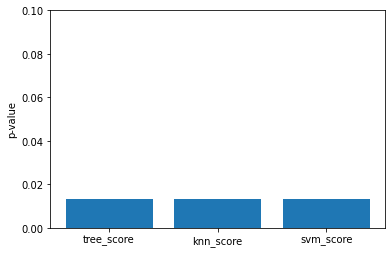

In [125]:
import matplotlib.pyplot as plt

data = [tree_score, knn_score, svm_score]
stat_friedman, p = friedmanchisquare(tree_score, knn_score, svm_score)

group_labels = ["tree_score", "knn_score", "svm_score"]
x_pos = np.arange(len(group_labels))

plt.bar(x_pos, p, align='center')
plt.xticks(x_pos, group_labels)
plt.ylabel("p-value")
plt.ylim(0,0.1) # limite al eje y en 0 y 1
plt.show()

En este ejemplo, se crea un gráfico de barras en donde el eje y representa el valor de p-value obtenido en el test de Friedman y el eje x representa los diferentes grupos de datos. Se establece el limite del eje y entre 0 y 1, ya que el valor de p-value siempre esta en ese rango. Así se puede apreciar mejor los valores.

Es importante tener en cuenta que el valor de p-value se refiere a la probabilidad de obtener los resultados actuales si los grupos de datos son realmente iguales, por lo que un valor de p-value menor a 0.05 indica que es poco probable que los datos sean iguales por casualidad, por lo que se concluye que existe una diferencia significativa entre los grupos de datos.

###**5. Compare el mejor método según el rango medio de Friedman con el resto de métodos usando el procedimiento de Holm.**###

Para comparar el mejor método según el rango medio de Friedman con el resto de métodos utilizando el procedimiento de Holm, se deben seguir los siguientes pasos:

Calcular el rango medio para cada método: se asigna un rango a cada valor de rendimiento (en este caso, la exactitud) y se suman los rangos para cada método. El rango medio para cada método se calcula dividiendo la suma de los rangos por el número de datos.

Aplicar el test de Friedman: se aplica el test de Friedman sobre los rangos medios de los métodos para determinar si existe alguna diferencia significativa entre los métodos. Si el valor p obtenido es menor que el nivel de significancia (por ejemplo, 0.05), se concluye que existen diferencias significativas entre los métodos.

Aplicar el procedimiento de Holm: se ordenan los métodos de acuerdo a su rango medio y se aplica el procedimiento de Holm para determinar qué método es el mejor y cuáles son significativamente diferentes del mejor. El procedimiento de Holm consiste en comparar cada método con el mejor método y calcular el valor p correspondiente. Si el valor p es menor que el nivel de significancia dividido por el número de comparaciones (por ejemplo, 0.05/3=0.0167), se concluye que el método es significativamente diferente del mejor.

In [128]:
stat_friedman, p_value_friedman = friedmanchisquare(tree_score, knn_score, svm_score)
print("Statistic: %.3f, p-value: %.3f" % (stat_friedman, p_value_friedman))

Statistic: 8.667, p-value: 0.013


Para comparar el mejor método según el rango medio de Friedman con el resto de métodos usando el procedimiento de Holm, se deben seguir los siguientes pasos:

Calcular el rango medio para cada método: se asigna un rango a cada valor de rendimiento (en este caso, la exactitud) y se suman los rangos para cada método. El rango medio para cada método se calcula dividiendo la suma de los rangos por el número de datos.

Aplicar el test de Friedman: se aplica el test de Friedman sobre los rangos medios de los métodos para determinar si existe alguna diferencia significativa entre los métodos. Si el valor p obtenido es menor que el nivel de significancia (por ejemplo, 0.05), se concluye que existen diferencias significativas entre los métodos.

Ordenar los métodos según su rango medio: se ordenan los métodos de acuerdo a su rango medio y se determina cuál es el mejor método.

Comparar cada método con el mejor método: se aplica un test de Wilcoxon para comparar cada método con el mejor método y se calcula el valor p correspondiente.

Aplicar la corrección de p-value: se divide el nivel de significancia por el número de comparaciones (en este caso, 2 comparaciones) y se compara con el valor p obtenido para cada método. Si el valor p es menor que el nivel de significancia corregido, se concluye que el método es significativamente diferente del mejor método.





In [142]:
from scipy.stats import friedmanchisquare, wilcoxon, rankdata
# Calcular el rango medio para cada método
tree_rank = rankdata(tree_score, method='average')
knn_rank = rankdata(knn_score, method='average')
svm_rank = rankdata(svm_score, method='average')

# Aplicar el test de Friedman
stat, p = friedmanchisquare(tree_rank, knn_rank, svm_rank)

if p < 0.05:
    # Ordenar los métodos según su rango medio
    methods = [tree_rank.mean(), knn_rank.mean(), svm_rank.mean()]
    methods_name = ['tree', 'knn', 'svm']
    methods_ordered = [x for _, x in sorted(zip(methods, methods_name), reverse=True)]

    # Aplicar el procedimiento de Holm
    best_method = methods_ordered[0]
    for method in methods_name:
      if method != best_method:
          if method == 'tree':
              stat, p = wilcoxon(tree_score, knn_score)
          elif method == 'knn':
              stat, p = wilcoxon(knn_score, svm_score)
          elif method == 'svm':
              stat, p = wilcoxon(svm_score, tree_score)
          # Aplicar la corrección de p-value
          alpha = 0.05 / 2
          if p < alpha:
              print(f"El método {method} es significativamente diferente del mejor método {best_method}")


In [143]:
methods_ordered

['svm', 'tree', 'knn']

###**6. Compare los métodos por parejas usando el procedimiento de Bonferroni-Dunn.**###

In [145]:
pip install scikit-posthocs
import scikit_posthocs as sp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
import scikit_posthocs as sp

In [150]:
methods = [tree_score, knn_score]
sp.posthoc_dunn(methods, p_adjust='bonferroni')


,1,2
1,1.000000,0.565992
2,0.565992,1.000000


In [151]:
methods = [tree_score, svm_score]
sp.posthoc_dunn(methods, p_adjust='bonferroni')

,1,2
1,1.00000,0.23323
2,0.23323,1.00000


In [152]:
methods = [knn_score, svm_score]
sp.posthoc_dunn(methods, p_adjust='bonferroni')

,1,2
1,1.000000,0.289066
2,0.289066,1.000000


###**7. Para uno de los clasificadores elegidos utilice una validación de los hiperparámetros con grid search y compare su rendimiento con el método con hiperparámetros fijados a priori.**###

En el caso de SVM ya se ha realizado anteriormente usando grid_search